## 3.2.6 If a tree falls in a forest...

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import math

# A convenience for displaying visualizations.
from IPython.display import Image

# Packages for rendering our tree.
import pydotplus

## Data import and cleanup

In [2]:
path = ("/Users/gemma/Documents/data science/DS bootcamp/table_8_offenses_known_to_law_enforcement_new_york_by_city_2013.csv"
            )
df = pd.read_csv(path, delimiter= ',', encoding='latin-1',header=0)


In [3]:
# getting names of columns to access them more easily
# and renaming murder because the name is messy

colnames = df.columns.values
print(colnames)

['City' 'Population' 'Violent\ncrime'
 'Murder and\nnonnegligent\nmanslaughter' 'Rape\n(revised\ndefinition)1'
 'Rape\n(legacy\ndefinition)2' 'Robbery' 'Aggravated\nassault'
 'Property\ncrime' 'Burglary' 'Larceny-\ntheft' 'Motor\nvehicle\ntheft'
 'Arson3']


In [4]:
df.head(3)

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Adams Village,"1,861",0,0.0,NaN,0,0,0,12,2,10,0,0.0
1,Addison Town and Village,"2,577",3,0.0,NaN,0,0,3,24,3,20,1,0.0
2,Akron Village,"2,846",3,0.0,NaN,0,0,3,16,1,15,0,0.0


In [5]:
df.dtypes

City                                       object
Population                                 object
Violent\ncrime                             object
Murder and\nnonnegligent\nmanslaughter    float64
Rape\n(revised\ndefinition)1              float64
Rape\n(legacy\ndefinition)2                object
Robbery                                    object
Aggravated\nassault                        object
Property\ncrime                            object
Burglary                                   object
Larceny-\ntheft                            object
Motor\nvehicle\ntheft                      object
Arson3                                    float64
dtype: object

In [6]:
# find nans
#np.where(pd.isnull(df))

# i originally ran this after the lambda function in the cleanup below to find the blanks
# they were rows 348 to 351
#np.where(df.applymap(lambda x: x == ''))

In [7]:
df.iloc[347:351,:]

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
347,Yorktown Town,"36,643",15,0.0,NaN,0,2,13,334,45,287,2,NaN
348,1 The figures shown in this column for the off...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
349,2 The figures shown in this column for the off...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
350,3 The FBI does not publish arson data unless i...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df = df.drop([348, 349,350])

In [9]:
len(df)

348

In [10]:
# cleaning up population and property crime 

num_cleanup = []

for col in colnames[1:4]:
    num_cleanup.append(col)

for col in colnames[6:12]:
    num_cleanup.append(col)

# there's at least one cell (in Population) with just a space, so filling blanks with NaN
df = df.replace(r'^\s*$', np.nan, regex=True)

# now dropping the row(s) that contain(s) the nan 
# df.dropna(axis=0, how='any', inplace=True)

# dropping commas and making integers

def cleanup(data_fr, numeric_str):
    # getting rid of commas
    data_fr[numeric_str] = data_fr[numeric_str].apply(lambda x: ''.join(list(filter(str.isdigit, str(x)))))

    # finally! the series is an integer (checked in the cell below)
    data_fr[numeric_str] = data_fr[numeric_str].astype(int)
    
    return

for one in num_cleanup:
    cleanup(df, one)

# double checking
df.dtypes


City                                       object
Population                                  int64
Violent\ncrime                              int64
Murder and\nnonnegligent\nmanslaughter      int64
Rape\n(revised\ndefinition)1              float64
Rape\n(legacy\ndefinition)2                object
Robbery                                     int64
Aggravated\nassault                         int64
Property\ncrime                             int64
Burglary                                    int64
Larceny-\ntheft                             int64
Motor\nvehicle\ntheft                       int64
Arson3                                    float64
dtype: object

In [11]:
df.head(3)

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Adams Village,1861,0,0,NaN,0,0,0,12,2,10,0,0.0
1,Addison Town and Village,2577,3,0,NaN,0,0,3,24,3,20,1,0.0
2,Akron Village,2846,3,0,NaN,0,0,3,16,1,15,0,0.0


In [12]:
# when generating the decision tree, i was getting an error w/ value 1,112

np.where(df.applymap(lambda x: x == '1,112'))

# just going to manually change it since its just 1
df.iloc[216,5] = 1112

# double checking
df.iloc[216,5]

1112

In [13]:
np.where(df.applymap(lambda x: x == 'Yorktown Town'))

(array([347]), array([0]))

In [14]:
df.drop(labels=['Rape\n(revised\ndefinition)1','Rape\n(legacy\ndefinition)2','Arson3'], axis=1, inplace=True)


In [15]:
fortree = df.iloc[:,1:]
fortree.drop(labels=['Property\ncrime'], axis=1, inplace=True)

fortree.head(5)

,Population,Violent crime,Murder and nonnegligent manslaughter,Robbery,Aggravated assault,Burglary,Larceny- theft,Motor vehicle theft
0,1861,0,0,0,0,2,10,0
1,2577,3,0,0,3,3,20,1
2,2846,3,0,0,3,1,15,0
3,97956,791,80,227,526,705,3243,142
4,6388,23,0,4,16,53,165,5


In [16]:
fortreey = df['Property\ncrime']

## Decision tree

In [17]:
from sklearn import tree

def main():
    
    # Initialize and train our tree.
    decision_tree = tree.DecisionTreeClassifier(
        criterion='entropy',
        max_features=1,
        max_depth=4,
    )
    decision_tree.fit(fortree, fortreey)

    # Render our tree.
    dot_data = tree.export_graphviz(
        decision_tree, out_file=None,
        feature_names=fortree.columns,
    #    class_names=['Not Returning', 'Returning'],
        filled=True
    )
    graph = pydotplus.graph_from_dot_data(dot_data)
    Image(graph.create_png())
    return

import time
start_time = time.time()
main()
print("--- %s seconds ---" % (time.time() - start_time))

--- 1.154850959777832 seconds ---


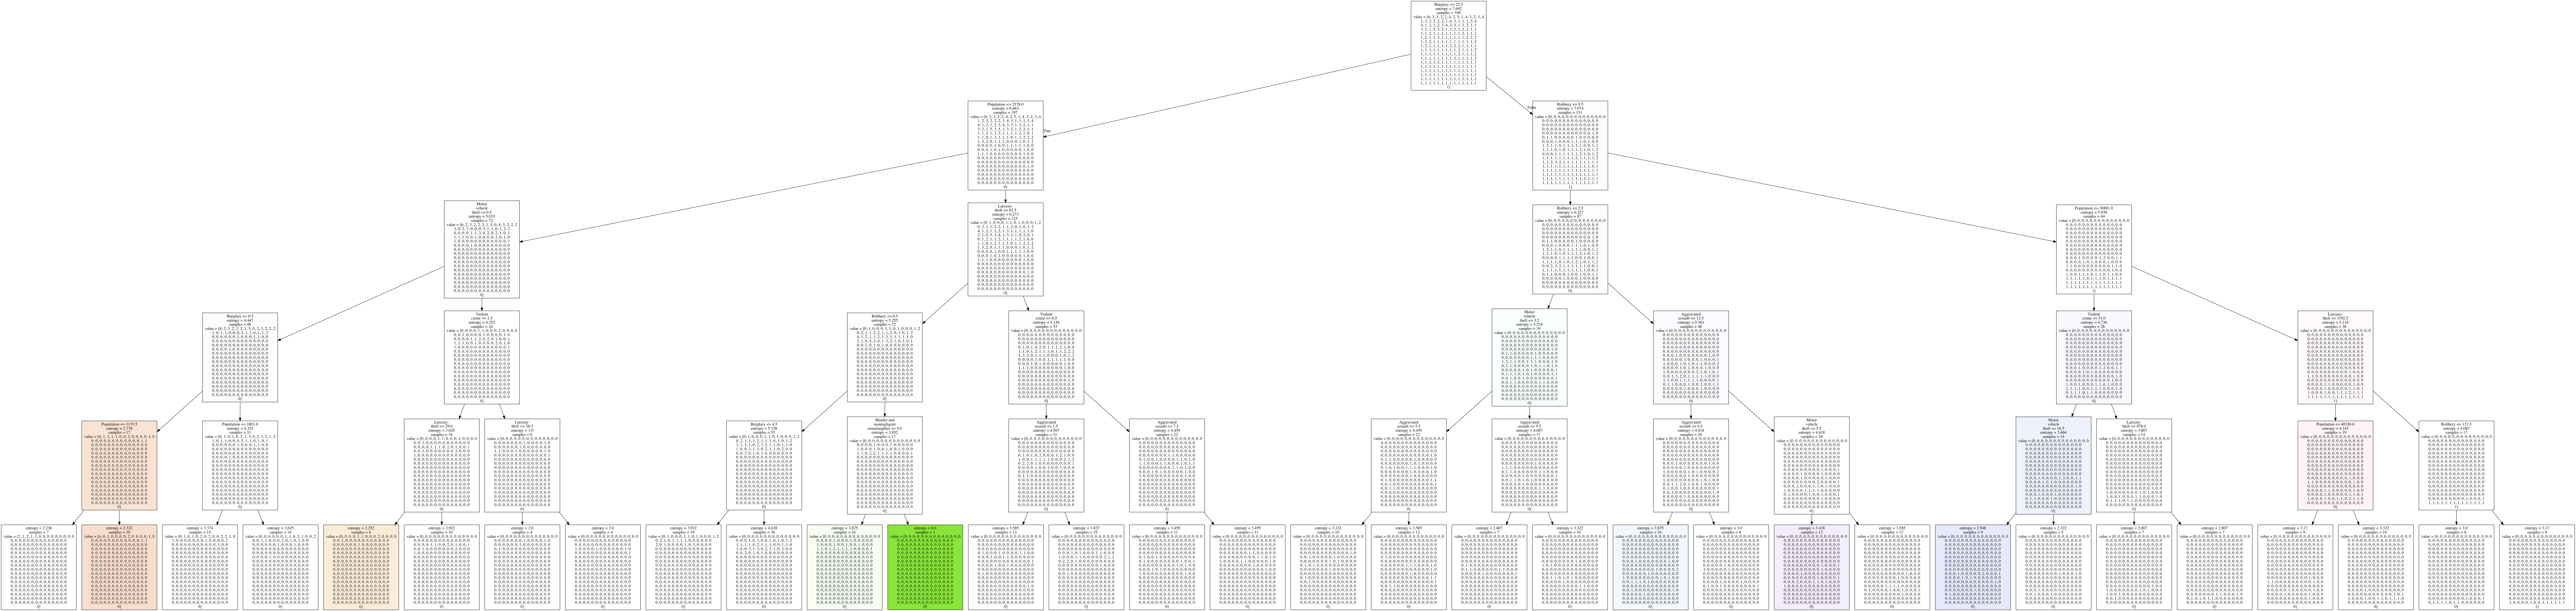

In [18]:
# Initialize and train our tree.
decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=1,
    max_depth=5,
)
decision_tree.fit(fortree, fortreey)

# Render our tree.
dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names=fortree.columns,
    filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())


In [19]:
# add test to test the accuracy

from sklearn import ensemble 
from sklearn.model_selection import cross_val_score

import statsmodels.formula.api as smf
from statsmodels.sandbox.regression.predstd import wls_prediction_std

dtc = tree.DecisionTreeClassifier()
X = fortree
Y = fortreey
X = pd.get_dummies(X)

cross_val_score(dtc, X, Y, cv=5)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


array([0.05      , 0.15384615, 0.14285714, 0.27272727, 0.25      ])

## Random forest

In [20]:
rfc = ensemble.RandomForestClassifier()
X = fortree
Y = fortreey
X = pd.get_dummies(X)

cross_val_score(rfc, X, Y, cv=5)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


array([0.03333333, 0.09230769, 0.07142857, 0.27272727, 0.25      ])

In [21]:
start_time = time.time()
cross_val_score(rfc, X, Y, cv=5)
print("--- %s seconds ---" % (time.time() - start_time))

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


--- 0.3739049434661865 seconds ---
